In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-earth/ne_110m_admin_0_countries.shx
/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp
/kaggle/input/natural-earth/ne_110m_admin_0_countries.dbf
/kaggle/input/natural-earth/ne_110m_admin_0_countries.prj
/kaggle/input/natural-earth/ne_110m_admin_0_countries.README.html
/kaggle/input/natural-earth/ne_110m_admin_0_countries.VERSION.txt
/kaggle/input/natural-earth/ne_110m_admin_0_countries.cpg
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


In [2]:
donald_trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')
donald_trump.loc[:,'Candidate'] = 'Donald Trump'
joe_biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')
joe_biden.loc[:,'Candidate'] = 'Joe Biden'
us_election_data = pd.concat([joe_biden,donald_trump])

# **Data Exploration**

In [3]:
us_election_data.sort_values(by='created_at').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747805 entries, 0 to 776885
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet_id              float64
 2   tweet                 object 
 3   likes                 float64
 4   retweet_count         float64
 5   source                object 
 6   user_id               float64
 7   user_name             object 
 8   user_screen_name      object 
 9   user_description      object 
 10  user_join_date        object 
 11  user_followers_count  float64
 12  user_location         object 
 13  lat                   float64
 14  long                  float64
 15  city                  object 
 16  country               object 
 17  continent             object 
 18  state                 object 
 19  state_code            object 
 20  collected_at          object 
 21  Candidate             object 
dtypes: float64(7), object(15)
memory usage: 306.7+ M

In [4]:
us_election_data.head()
us_election_data.head(2).T

,0,1
created_at,2020-10-15 00:00:01,2020-10-15 00:00:18
tweet_id,1316529221557252096.0,1316529295859290112.0
tweet,#Elecciones2020 | En #Florida: #JoeBiden dice ...,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...
likes,0.0,0.0
retweet_count,0.0,0.0
source,TweetDeck,Twitter for iPad
user_id,360666534.0,809904438.0
user_name,El Sol Latino News,Cheri A. 🇺🇸
user_screen_name,elsollatinonews,Biloximeemaw
user_description,🌐 Noticias de interés para latinos de la costa...,"Locked and loaded Meemaw. Love God, my family ..."


In [5]:
print('There are {} rows and {} columns in train'.format(us_election_data.shape[0],us_election_data.shape[1]))
print('There are {} rows and {} columns in train'.format(us_election_data.shape[0],us_election_data.shape[1]))

There are 1747805 rows and 22 columns in train
There are 1747805 rows and 22 columns in train


### Dataset Summary

This dataset contains tweets collected using the Twitter API statuses_lookup and snsscrape, covering the period from **15th October 2020 to 8th November 2020**. The initial goal was to update the dataset daily, with the intention of reflecting ongoing events related to the 2020 U.S. election.

The U.S election took place on **3 November 2020**

**On November 7**, most national media organizations projected that Biden had clinched enough electoral votes to be named the U.S. president-elect.



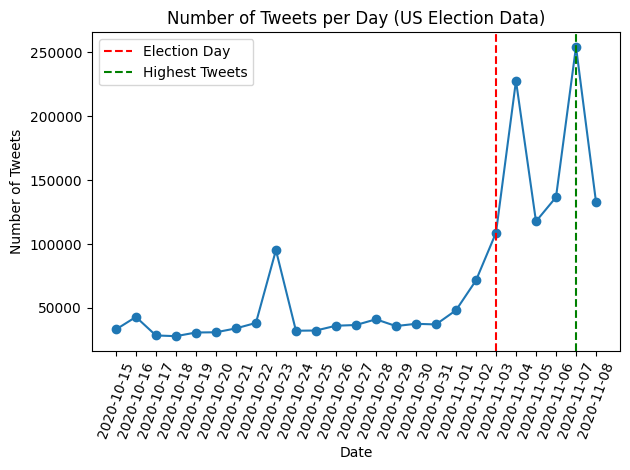

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming us_election_data is your DataFrame with the 'created_at' column
us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Find the date with the highest number of tweets
date_with_highest_tweets = tweets_per_day.idxmax()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2020-10-15', end='2020-11-08', freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)

# Add markers for the 3rd of November and the day with the highest tweets
ax.axvline(pd.Timestamp('2020-11-03'), color='red', linestyle='--', label='Election Day')
ax.axvline(date_with_highest_tweets, color='green', linestyle='--', label='Highest Tweets', linewidth=1.5)

ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=70)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day (US Election Data)')

plt.tight_layout()
plt.show()


# **Exploring Location**

In [7]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Load the world map data from the uploaded Shapefile
shapefile_path = '/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp'

# Load the Shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Define the Coordinate Reference System (CRS)
crs = world.crs  # Use the CRS from the world map data

# Combine and clean latitude and longitude data
tmp = pd.concat([donald_trump[['lat', 'long']].copy(), joe_biden[['lat', 'long']].copy()])
tmp = tmp.dropna()

# Create Point geometries using Shapely
geometry = [Point(xy) for xy in zip(tmp['long'], tmp['lat'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(tmp, crs=crs, geometry=geometry)


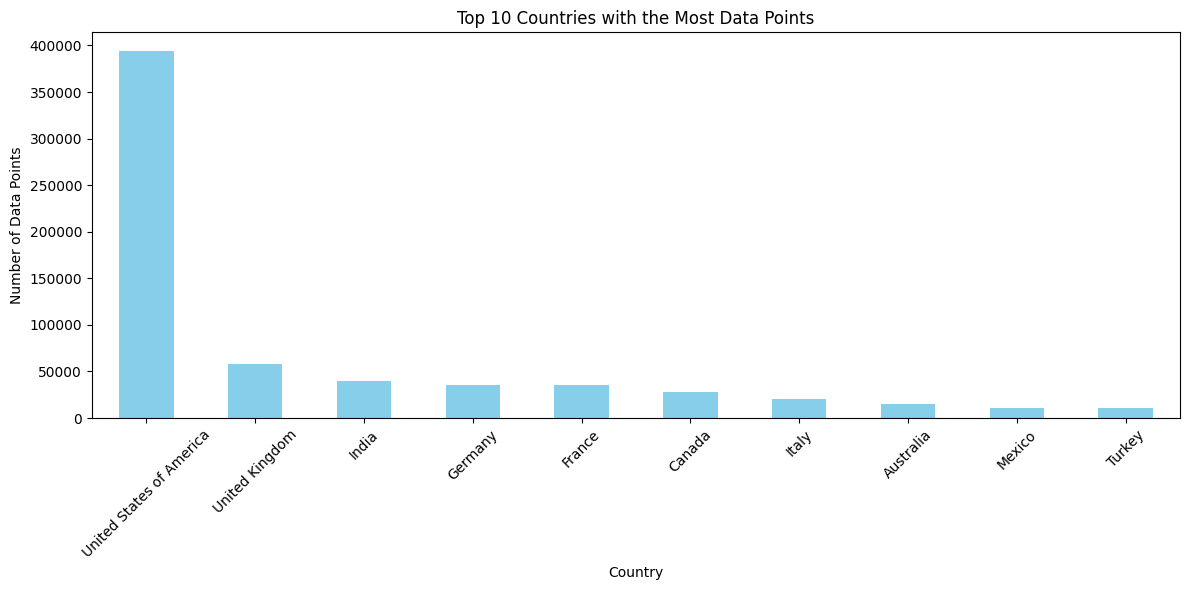

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

us_election_data['country'] = us_election_data['country'].replace({'United States': 'United States of America'})

# Assuming your dataset is named 'geo_df' and it has a 'country' column
top_10_countries = us_election_data['country'].value_counts().nlargest(10)

# Create a bar graph
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Data Points')
plt.xlabel('Country')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


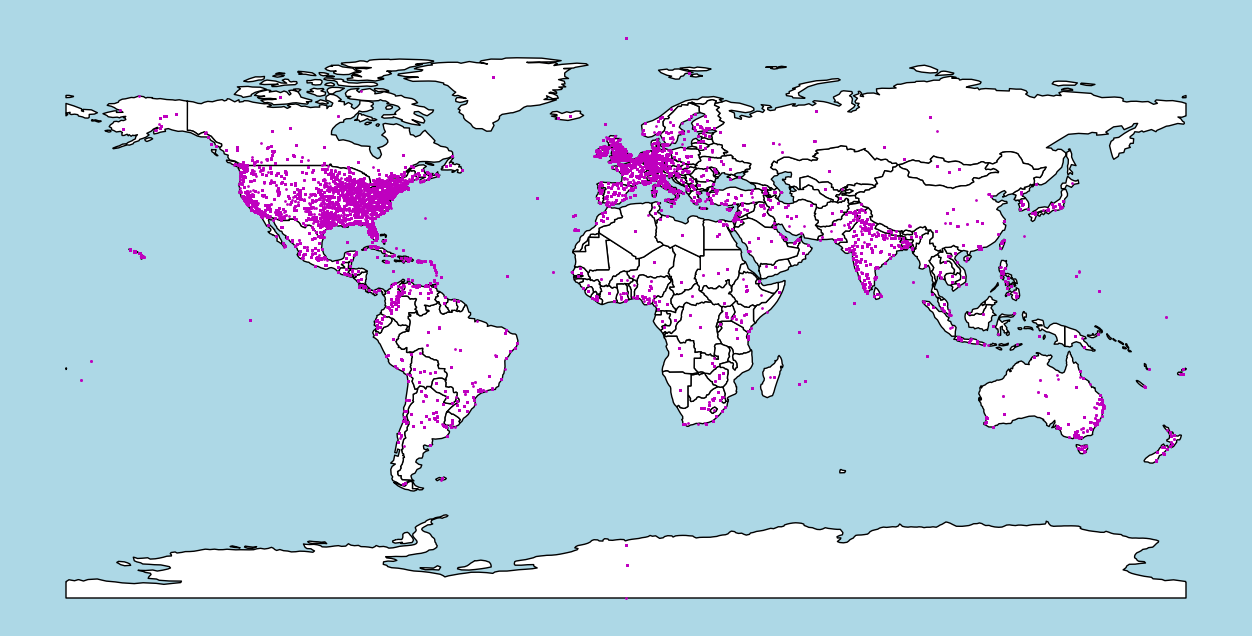

In [9]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

# Plot the world map with white color
world.plot(ax=ax, color='white', edgecolor='black')

# Plot your geo_df data
geo_df.plot(ax=ax, markersize=1, color='m', marker='o')

# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()
